# 1. DATA COLLECTION, ANALYSIS AND DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle

In [2]:
train = pd.read_excel('C:/Users/sugosh/Downloads/Data_Train.xlsx')    # Read the Training data
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train['Destination'].value_counts()  # View the most visited destination from the dataset

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [4]:
# Combine data values for 'Delhi' and 'New Delhi'

def newd(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x

train['Destination'] = train['Destination'].apply(newd)

In [5]:
# Check for null values 

train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train.dropna(inplace = True)  # Drop the null values

train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
train.dtypes  # Explore the data types of the dataset

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### By exploring the data types , we see that all the Date categories like Arrival time, Departure time, Duration and Date of Journey are 'object' type, i.e , it contains string values that the ML model will not understand. We have to convert this into a timestamp format for prediction of prices.

In [8]:
# Extract the day and month from the date and adds two new columns

train['Journey_Day'] = pd.to_datetime(train['Date_of_Journey'],format='%d/%m/%Y').dt.day
train['Journey_Month'] = pd.to_datetime(train['Date_of_Journey'],format='%d/%m/%Y').dt.month

train.drop('Date_of_Journey',inplace=True,axis=1)  # Drop the original 'Date_of_Journey' column to keep the processed data

train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [9]:
#  Extract hour and minutes from departure time and arrival time

train['Dep_Hour'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_Mins'] = pd.to_datetime(train['Dep_Time']).dt.minute

train['Arrival_Hour'] = pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_Mins'] = pd.to_datetime(train['Arrival_Time']).dt.minute

# Drop both the original columns to keep the processed data
train.drop('Dep_Time',axis=1,inplace=True)
train.drop('Arrival_Time',axis=1,inplace=True)

train.head()

C:\Users\sugosh\AppData\Local\Temp\ipykernel_22648\2354239915.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Dep_Hour'] = pd.to_datetime(train['Dep_Time']).dt.hour
C:\Users\sugosh\AppData\Local\Temp\ipykernel_22648\2354239915.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Dep_Mins'] = pd.to_datetime(train['Dep_Time']).dt.minute
C:\Users\sugosh\AppData\Local\Temp\ipykernel_22648\2354239915.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Arrival_Hour'] = pd.to_datetime(train['Arrival_Time']).dt.hour
C:\Users\sugosh\AppData\Local\Temp\ipykern

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


> Time taken by the plane to reach its destination is called Duration. It is the difference between the Departure Time and Arrival time

In [10]:
train['Duration'] # Analyse The Duration column

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

### Now, In the duration column, we can see that there are some values that do not have minutes and some may not have hours mentioned. We have to change it to a standard " 00h : 00m " format first and then convert the string type into numerical values.

In [11]:
# Function to Convert every duration to same time display format " 00 h :00 m "

def add_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [12]:
train['Duration'].apply(add_duration)  # Apply the function on the Duration Column

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [13]:
train['Duration'] = train['Duration'].apply(add_duration)  # Update the new values into original column

train['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

> Now to convert it into int type, we split the string by index and apply an anonymous function lambda. An anonymous function an take any number of arguments, but can only have one expression. <br><br>
It is of the form:
<h align='center'>`lambda arguments : expression`</h>

***
<h4 align='center'><i> ~ Subsection : Analyze the various formats and indexing of the split function and how to code the lambda function ~ </i></h4>

In [14]:
train['Duration'][0]

'2h 50m'

In [15]:
'2h 50m'.split(' ')

['2h', '50m']

In [16]:
'2h 50m'.split(' ')[0]

'2h'

![image](https://pynative.com/wp-content/uploads/2021/02/positive-and-negative-indexing.jpg)

In [17]:
'2h 50m'.split(' ')[0][0:-1] # [0 from positive index : -1 from negative index]

'2'

In [18]:
type('2h 50m'.split(' ')[0][0:-1]) # Analyse the datatype

str

In [19]:
int('2h 50m'.split(' ')[0][0:-1]) # Convert string to int

2

_We Will Use The above methode to code our lambda function to convert all the duration column values into int_
<h4 align='center'><i> ~ End Of Subsection ~ </i></h4>

***

In [20]:
# Function to convert hours and minutes from string to int
# Apply function on duration column to obtain 2 new columns with int values
# Update the original dataset

train['Duration_Hours'] = train['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
train['Duration_Mins'] = train['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [21]:
train.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day         int32
Journey_Month       int32
Dep_Hour            int32
Dep_Mins            int32
Arrival_Hour        int32
Arrival_Mins        int32
Duration_Hours      int64
Duration_Mins       int64
dtype: object

# 2. EXPLORATORY MULTI-VARIATE DATA ANALYSIS ( EDA )

- ### To Analyze what time of the day most flights take off

In [22]:
# Convert the flight Dep_Time into late night, morning, early morning, afternoon and evening.

def flight_dep_time(x):
    
    '''
    This function takes the flight Departure time 
    and converts it into appropriate format.
    
    '''
    
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "Late night"

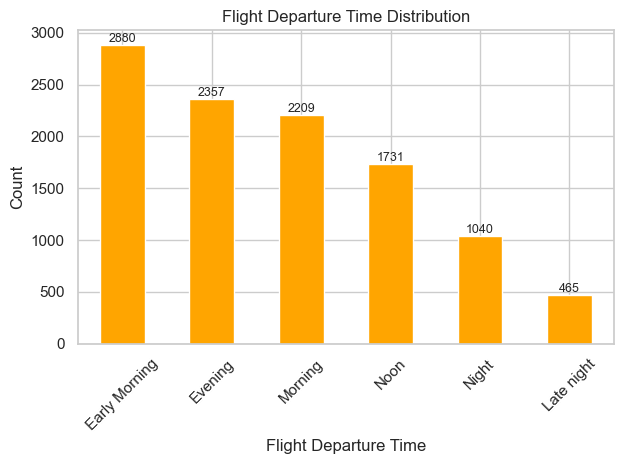

In [109]:
# Apply the flight_dep_time function to the 'Dep_Time_hour' column and get value counts
value_counts = train['Dep_Hour'].apply(flight_dep_time).value_counts()

# Create the bar plot using pandas plot function
ax = value_counts.plot(kind="bar", color="orange")

# Customize the plot with labels and title
ax.set_xlabel("Flight Departure Time")
ax.set_ylabel("Count")
ax.set_title("Flight Departure Time Distribution")

# Add count labels above the bars
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Rotate the x-axis labels for better visibility
ax.tick_params(axis='x', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


- ### To Analyze if the duration of the flight affects its price

C:\Users\sugosh\anaconda3\envs\flightprice\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sugosh\AppData\Local\Temp\ipykernel_22648\3399410061.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


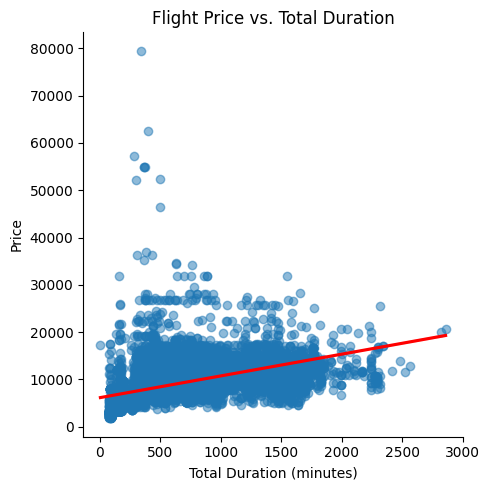

In [23]:
# Function to convert duration string to total minutes
def convert_duration_to_minutes(duration_str):
    hours, minutes = duration_str.split('h ')
    return int(hours) * 60 + int(minutes[:-1])

# Apply the function to the 'duration' column to convert it to total minutes
train['Total_Duration_Minutes'] = train['Duration'].apply(convert_duration_to_minutes)

# Create a lmplot using Seaborn
sns.lmplot(x='Total_Duration_Minutes', y='Price', data=train, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Customize the plot with labels and title
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Price')
plt.title('Flight Price vs. Total Duration')

# Display the plot
plt.tight_layout()
plt.show()

> Clearly, as the total duration of the flight increases, the time also increases

- ### To Analyze if the Total number of stops affect the flight price

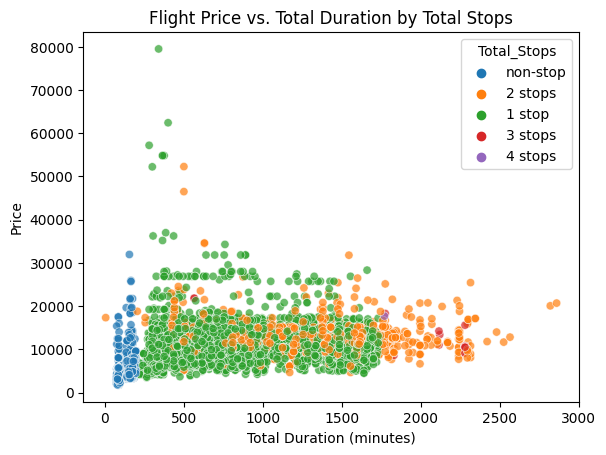

In [24]:
'''

  To create a scatter plot using Seaborn's scatterplot function, which will show the relationship between 
  the total duration of flights, their prices, and the number of total stops,
  using different colors for each number of stops.
  
'''

sns.scatterplot(x='Total_Duration_Minutes', y='Price', hue="Total_Stops", data=train, alpha=0.7)

# Customize the plot with labels and title
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Price')
plt.title('Flight Price vs. Total Duration by Total Stops')

# Display the plot
plt.show()

>Non stops flights take least duration while their fare is also the least, then as the stops increase, 
the duration and price also increase (in most of the cases)

- ### Airline vs Price Analysis

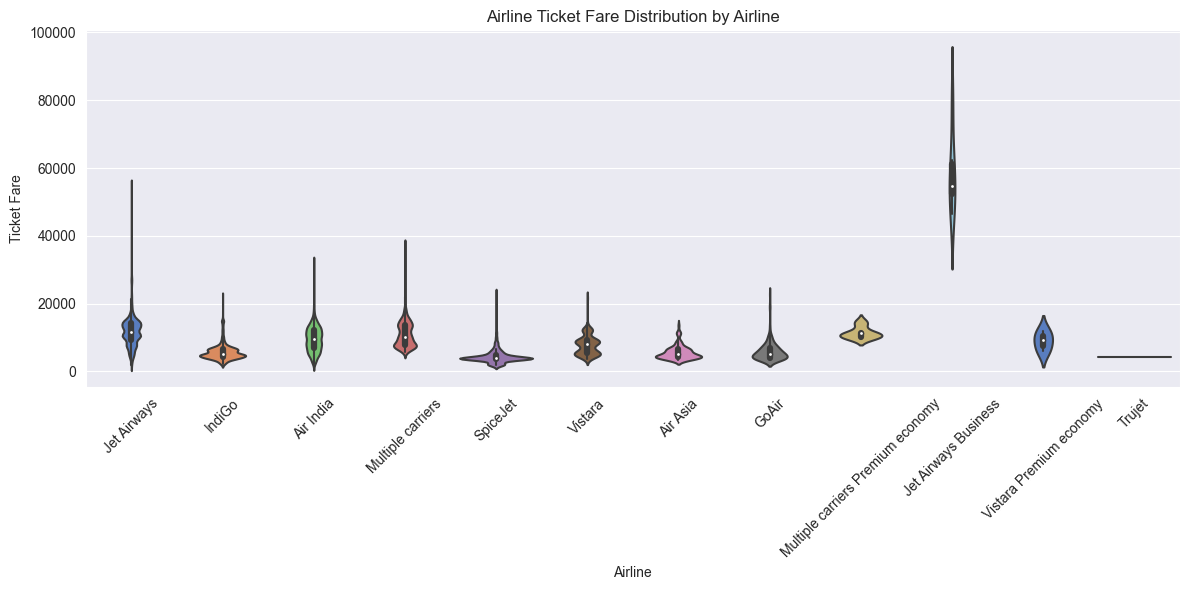

In [25]:
# Set the 'darkgrid' style
sns.set_style('darkgrid')

plt.figure(figsize=(12, 6))  # Set the size of the figure

# Create the violin plot with custom palette and order
sns.violinplot(
    x='Airline',
    y='Price',
    data=train.sort_values('Price', ascending=False),
    palette='muted',  
    order=train['Airline'].value_counts().index,  # Order airlines by the number of occurrences
)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add plot title and axis labels
plt.title('Airline Ticket Fare Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Ticket Fare')

plt.tight_layout()  # Adjust the layout to prevent label overlapping
plt.show()  # Display the plot

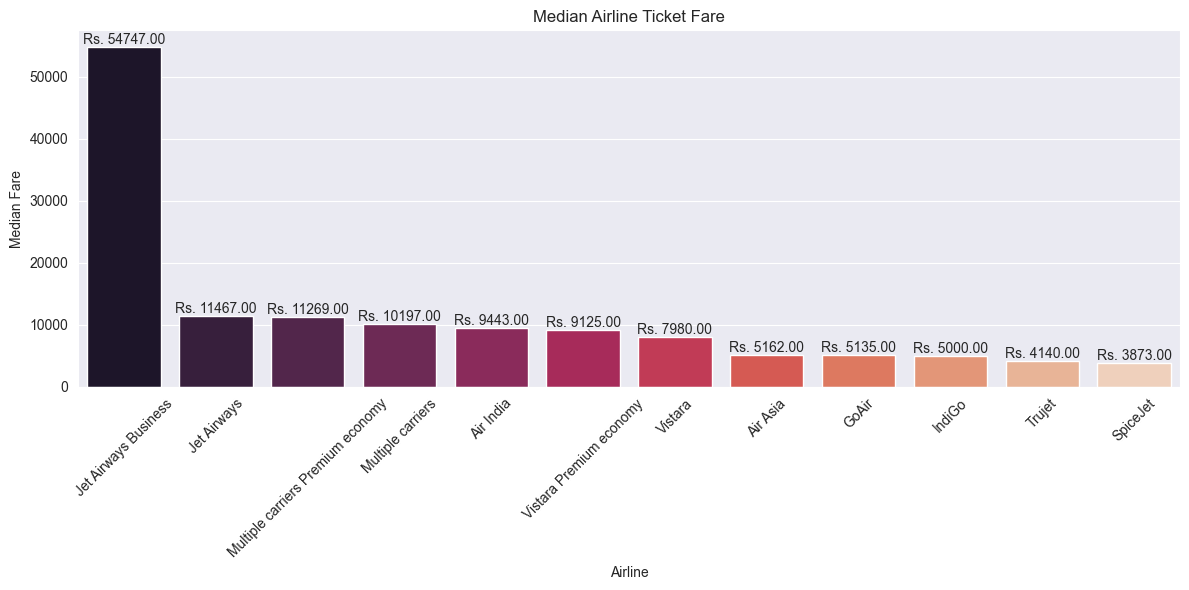

In [26]:
# Set the 'darkgrid' style
sns.set_style('darkgrid')

plt.figure(figsize=(12, 6))  # Set the size of the figure

# Calculate the median ticket fare for each airline and sort in descending order
median_fares = train.groupby('Airline')['Price'].median().sort_values(ascending=False)

# Create the bar plot with custom palette and sorted order
sns.barplot(
    x=median_fares.index,
    y=median_fares.values,
    palette='rocket',  
)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add fare labels above each bar
for index, value in enumerate(median_fares.values):
    plt.text(index, value, f"Rs. {value:.2f}", ha='center', va='bottom', fontsize=10)

# Add plot title and axis labels
plt.title('Median Airline Ticket Fare')
plt.xlabel('Airline')
plt.ylabel('Median Fare')

plt.tight_layout()  # Adjust the layout to prevent label overlapping
plt.show()  # Display the plot


>The median airline ticket fare is an essential statistic because it is less sensitive to extreme values or outliers compared to the mean. It provides a robust estimate of the central value of the ticket fares in the dataset.

> Jet Airways Business is the costliest whereas almost all the other flights have a similar median price.

# 3. FEATURE ENGINEERING

## A ML model cannot understand categorical data (string ), it has to be converted into a vector form ( numericals ). To do this we perform Encoding. 
### <font color='blue'> One-Hot Encoding</font> : Creates new variables where the source category value is assigned 1 and all the other values are assigned 0. This is done for Nominal data (without order)
### <font color='blue'> Label Encoding</font> : Assigns each categorical value an integer based on its order of preference. This is done for Ordinal data

In [27]:
train.columns # Get all the column names

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Mins', 'Arrival_Hour', 'Arrival_Mins', 'Duration_Hours',
       'Duration_Mins', 'Total_Duration_Minutes'],
      dtype='object')

In [28]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,Total_Duration_Minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45,285


In [29]:
# Now we will perform OneHot Encoding on Source column as it is a categorical data

Source = train[['Source']]

# function returns a new DataFrame with the one-hot encoded columns.
Source = pd.get_dummies(Source,drop_first=True).astype(int)

# Add the new columns to the original 'train' DataFrame
train = pd.concat([train, Source], axis=1)

train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,...,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,Total_Duration_Minutes,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,20,1,10,2,50,170,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,50,13,15,7,25,445,0,0,1,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,25,4,25,19,0,1140,0,1,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,...,5,23,30,5,25,325,0,0,1,0
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,...,50,21,35,4,45,285,0,0,0,0


In [30]:
# Analyse the Airline column
train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [31]:
train['Airline'].nunique()

12

### Here we can see that Airline column has 12 subcategories, which means adding 12 more new columns. As the number of subcategories increase, it becomes a problem for the ML model as it would lead to - <br> <font color='green'>Curse Of Dimensionality</font> : The term referring to the problems of increased computational complexity, data sparsity, overfitting of the model and data redundancy. <br> To avoid this we performed optimized feature encodind techniques like <font color='blue'>Target-guided encoding</font>

> We will consider Price as our target, find the mean price for every airline and assign higher int values for higher mean prices

In [32]:
# Group data by Airline, find mean price for each airline and sort in ascending order by price
train.groupby(['Airline'])['Price'].mean().sort_values() 

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [33]:
# Get the Airline names in sorted order and store it in a list
airlines = train.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [34]:
# Convert list into dictionary with each airline having its importance integer

# Function to initialize index for airlines from 0, form a key-value pair and store it as a dictionary 
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [35]:
# Map this new dictionary to original Airlines column
train['Airline'].map(dict_airlines) # Coverting airline names to their values

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [36]:
# Update to the original dataset
train['Airline'] = train['Airline'].map(dict_airlines)

train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,...,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,Total_Duration_Minutes,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,20,1,10,2,50,170,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,50,13,15,7,25,445,0,0,1,0
2,10,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,25,4,25,19,0,1140,0,1,0,0
3,3,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,...,5,23,30,5,25,325,0,0,1,0
4,3,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,...,50,21,35,4,45,285,0,0,0,0


> Perform Target Guided encoding on Destination column

In [37]:
# Group data by Destination find mean price for each destination and sort in ascending order by price
train.groupby(['Destination'])['Price'].mean().sort_values() 

Destination
Kolkata       4789.892388
Hyderabad     5059.708752
Delhi         8017.464269
Banglore      9158.389411
Cochin       10540.113536
Name: Price, dtype: float64

In [38]:
# Get the destination names in sorted order and store it in a list
destination = train.groupby(['Destination'])['Price'].mean().sort_values().index
destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [39]:
# Convert list into dictionary with each destination having its importance integer

# Function to initialize index for destination from 0, form a key-value pair and store it as a dictionary 
dict_destination = {key:index for index , key in enumerate(destination , 0)}

dict_destination

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [40]:
# Map this new dictionary on the original Destination column
train['Destination'].map(dict_destination) # Coverting destination names to their values

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [41]:
# Update to the original dataset
train['Destination'] = train['Destination'].map(dict_destination)

train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,...,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,Total_Duration_Minutes,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,20,1,10,2,50,170,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,50,13,15,7,25,445,0,0,1,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,25,4,25,19,0,1140,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,...,5,23,30,5,25,325,0,0,1,0
4,3,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,...,50,21,35,4,45,285,0,0,0,0


> As Total_Stops is ordinal dat, we have to perform label encoding and convert it into integers. We will Manually build a label encoder instead of using the sklearn package

In [42]:
train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [43]:
# Form a key-value pair and assign it to an empty dict
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [44]:
# Map it on top of Total_Stops converting the string into integers
train['Total_Stops'].map(stop)

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [45]:
# Update original dataset with the new column
train['Total_Stops'] = train['Total_Stops'].map(stop)

train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,...,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,Total_Duration_Minutes,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,3,...,20,1,10,2,50,170,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,50,13,15,7,25,445,0,0,1,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,6,...,25,4,25,19,0,1140,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,...,5,23,30,5,25,325,0,0,1,0
4,3,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,...,50,21,35,4,45,285,0,0,0,0


# 4. DATA CLEANING
### We will remove all the unnecessary columns

In [46]:
train['Additional_Info'].value_counts()/len(train)*100

# Additional_Info contains almost 80% no_info,so we can drop this column

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [47]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Mins', 'Arrival_Hour', 'Arrival_Mins', 'Duration_Hours',
       'Duration_Mins', 'Total_Duration_Minutes', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

> 
- Additional_Info contains almost 80% no_info , so drop this column .
- Drop Total_Duration_Minutes as we have already extracted "Duration_hours" & "Duration_mins"
- Drop "Source" feature as we have already perform feature encoding on this Feature 
- Drop Route as it is not required. We already havy Total_Stops which is similar

In [48]:
train.drop(columns=['Additional_Info' , 'Total_Duration_Minutes' , 'Source'] , axis=1 , inplace=True)

In [49]:
train.head()

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,0,1,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,0,1,0
4,3,2,BLR → NAG → DEL,4h 45m,1,13302,1,3,16,50,21,35,4,45,0,0,0,0


In [50]:
train.drop(columns=['Route'] , axis=1 , inplace=True)

In [51]:
train.head()

,Airline,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,0,1,0
2,10,4,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,1,0,0
3,3,3,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,0,1,0
4,3,2,4h 45m,1,13302,1,3,16,50,21,35,4,45,0,0,0,0


In [52]:
# Drop Duration as we have already extracted required Features
train.drop(columns=['Duration'] , axis=1 , inplace=True)

train.head()

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,0,1,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0
4,3,2,1,13302,1,3,16,50,21,35,4,45,0,0,0,0


### We will perform Outlier Detection and Cleaning

Bcs ML model will be impacted with very high or very low values

In [53]:

def plot_airline_price_outliers(df, col):
    # Set style and color palette for the plots
    sns.set(style='whitegrid')
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
    
    # Plot 1: Distribution plot (histogram with KDE)
    sns.histplot(df[col], kde=True, ax=ax1, color=colors[0])
    ax1.set_xlabel(col)
    ax1.set_ylabel('Density')
    
    # Plot 2: Box plot
    sns.boxplot(df[col], ax=ax2, color=colors[1])
    ax2.set_xlabel(col)
    
    # Plot 3: Strip plot with outliers highlighted
    sns.stripplot(x=df[col], ax=ax3, color=colors[2], alpha=0.7)
    sns.boxplot(x=df[col], ax=ax3, color=colors[3], showfliers=False)
    ax3.set_xlabel(col)
    ax3.set_ylabel('')
    
    plt.tight_layout()
    plt.show()


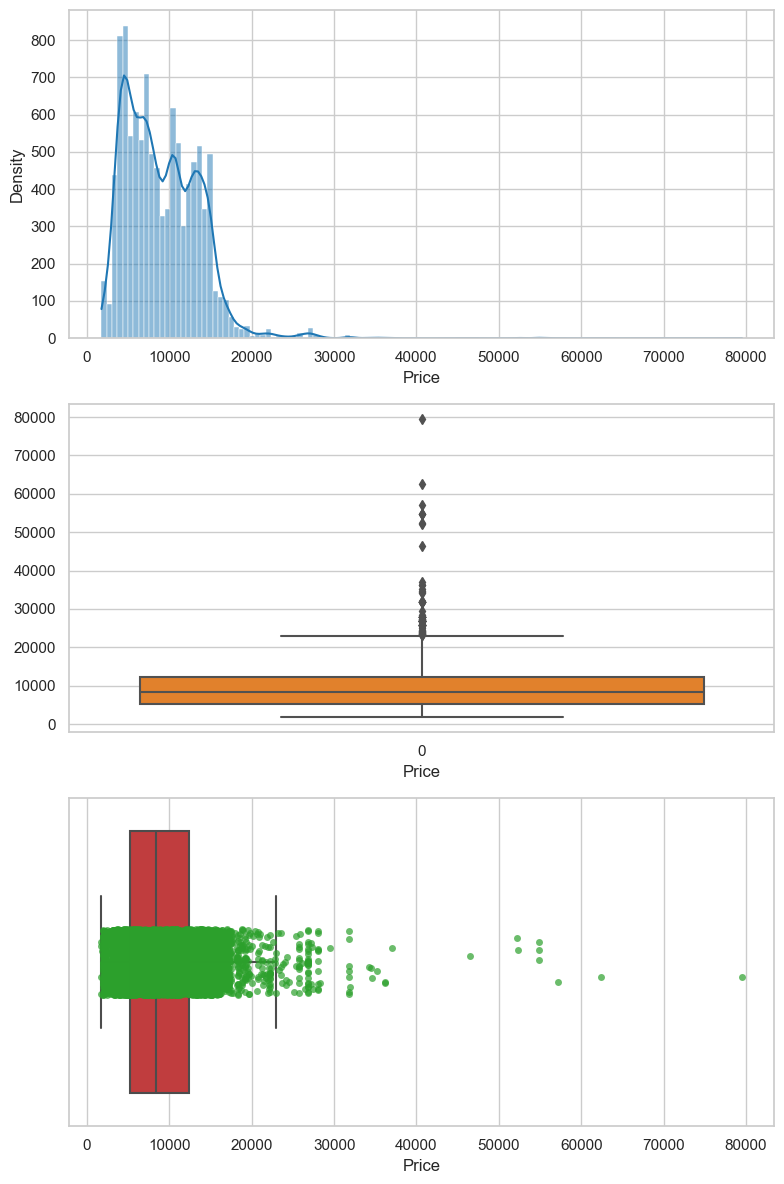

In [141]:
plot_airline_price_outliers(train, 'Price')

> Now, as the features are skewed we will use IQR method to identify the outlier range and outliers. <br>
`IQR = 75th%ile data - 25th%ile data` ----> Data points > IQR + 1.5(IQR) and < IQR - 1.5(IQR) are the outliers

In [54]:
q1 = train['Price'].quantile(0.25)
q3 = train['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [55]:
print(maximum)

23017.0


In [56]:
print(minimum)

-5367.0


In [57]:
# Values < -5367 and > 23017 are the outliers. Get a list of all those values

outliers = [price for price in train['Price'] if price > maximum or price < minimum] 
print(outliers)

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [58]:
# Get total number of outliers
print("Total number of outliers:", len(outliers))

Total number of outliers: 94


In [59]:
# Calculate the median of the non-outlier values
median_without_outliers = train[~train['Price'].isin(outliers)]['Price'].median()

# Replace the outliers with the median of the non-outlier values
train.loc[train['Price'].isin(outliers), 'Price'] = median_without_outliers

# Display the DataFrame with outliers replaced by the median
print(train)

       Airline  Destination  Total_Stops  Price  Journey_Day  Journey_Month  \
0            3            2            0   3897           24              3   
1            7            3            2   7662            1              5   
2           10            4            2  13882            9              6   
3            3            3            1   6218           12              5   
4            3            2            1  13302            1              3   
...        ...          ...          ...    ...          ...            ...   
10678        2            3            0   4107            9              4   
10679        7            3            0   4145           27              4   
10680       10            2            0   7229           27              4   
10681        5            2            0  12648            1              3   
10682        7            4            2  11753            9              5   

       Dep_Hour  Dep_Mins  Arrival_Hour  Arrival_Mi

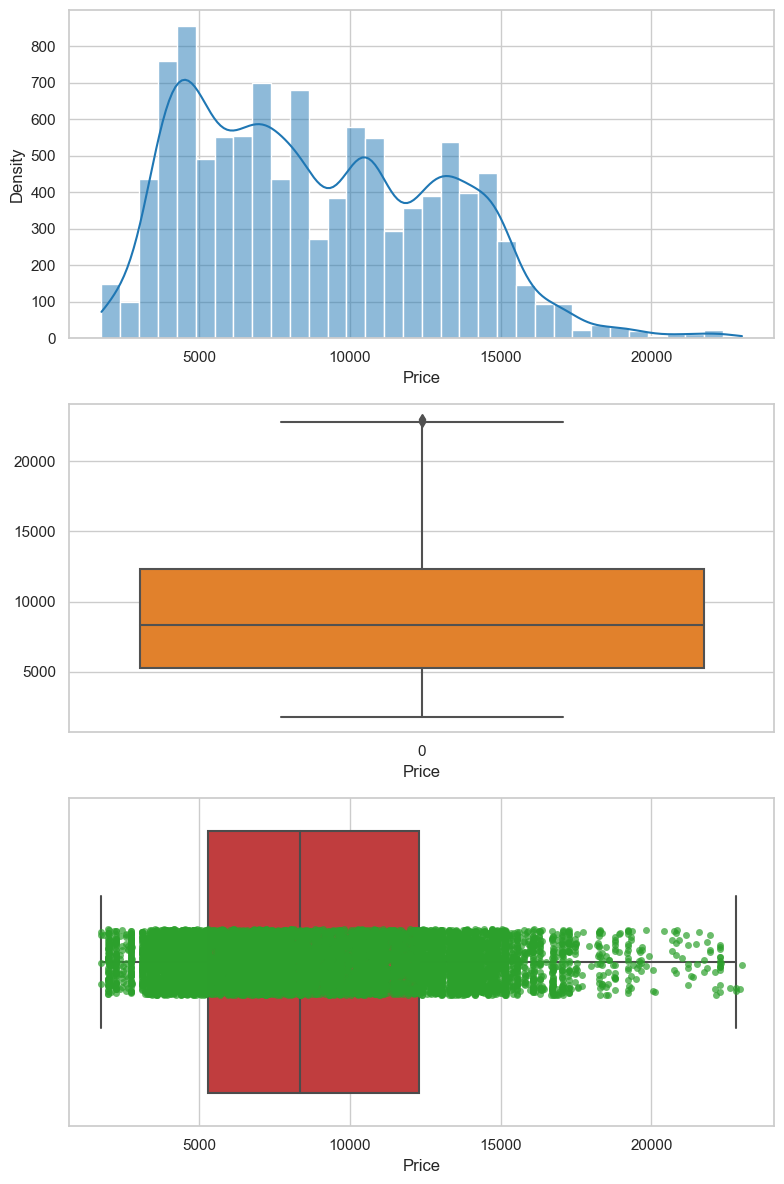

In [60]:
plot_airline_price_outliers(train, 'Price')

# 5. FEATURE SELECTION

Selection of best features that would help us in predicting the price,which is our target variable, more efficiently to get rid of curse of dimensionality, i.e. ,to get rid of duplicate features

> We will use Mutual Information Regression method to calculate the dependency between 2 random variables.<br>
if <font color='blue'>$MI = 0$</font> then the variables are <font color='green'>Completely Independent</font> <br>
if <font color='blue'>$MI \simeq 1$ or higher</font> then the variables have <font color='green'> Higher Dependency</font>  <br> 

In [61]:
ind_var = train.drop(['Price'] , axis=1)  # Independent variable that has all column values except 'Price'

In [62]:
target_var = train['Price']  # Target varible that has all values from the Price column

In [63]:
from sklearn.feature_selection import mutual_info_regression

# To calculate the MI importance score for each independent feature and store the values in a variable imp
imp = mutual_info_regression(ind_var , target_var)

# Print the values of the Mutual Information Regression importance score for each feature
print(imp)

[0.97429158 0.99978581 0.79493709 0.23495169 0.63291074 0.34107518
 0.25523714 0.39814331 0.34829484 0.46378115 0.34045472 0.13495909
 0.5240658  0.45959456 0.19132698]


In [64]:
# Store and display as a dataframe for better understanding

imp_df = pd.DataFrame(imp , index=ind_var.columns)
imp_df.columns = ['Importance Score']
imp_df.sort_values(by='Importance Score' , ascending=False) # Sort the score in descending order

,Importance Score
Destination,0.999786
Airline,0.974292
Total_Stops,0.794937
Journey_Month,0.632911
Source_Delhi,0.524066
Duration_Hours,0.463781
Source_Kolkata,0.459595
Arrival_Hour,0.398143
Arrival_Mins,0.348295
Dep_Hour,0.341075


> As there are only a few features and each feature here is showing a good dependency with the target variable we do not need to drop any columns and can proceed with model building

# 6. MODEL BUILDING
### Random Forest Model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# We Split the data set into 75 % of training data and 25 % testing data
# X are independent variables and y is the target
X_train, X_test, y_train, y_test = train_test_split(
    ind_var, target_var, test_size=0.25, random_state=42)             

rf_model = RandomForestRegressor()

rf_model.fit(X_train , y_train) # Fit the model on our dataset

RandomForestRegressor()

In [67]:
# Make predictions using the model on test data

model= rf_model.fit(X_train , y_train)

y_pred = rf_model.predict(X_test)

print('The Training Score is: {:.2f}%'.format(model.score(X_train,y_train)*100))

print('The Predicted prices are: {}'.format(y_pred))

The Training Score is: 94.65%
The Predicted prices are: [16798.76  5216.61  8969.73 ...  3493.18  6379.16  6850.37]


In [68]:
# Evaluate Metrics of the prediction model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

# Convert metrics to percentages
mae_percent = mae * 100
mse_percent = mse * 100
rmse_percent = rmse * 100
r_squared_percent = r_squared * 100

# Create a dictionary to store the metrics in percentages
metrics_dict_percent = {
    'Mean Absolute Error (MAE)': f'{mae_percent:.2f}%',
    'Mean Squared Error (MSE)': f'{mse_percent:.2f}%',
    'Root Mean Squared Error (RMSE)': f'{rmse_percent:.2f}%',
    'R-squared': f'{r_squared_percent:.2f}%'
}

# Create a DataFrame from the metrics_dict_percent
metrics_df_percent = pd.DataFrame.from_dict(metrics_dict_percent, orient='index', columns=['Score'])

# Display the metrics DataFrame in percentage format
print(metrics_df_percent)

                                        Score
Mean Absolute Error (MAE)          116199.96%
Mean Squared Error (MSE)        329696121.83%
Root Mean Squared Error (RMSE)     181575.36%
R-squared                              79.69%


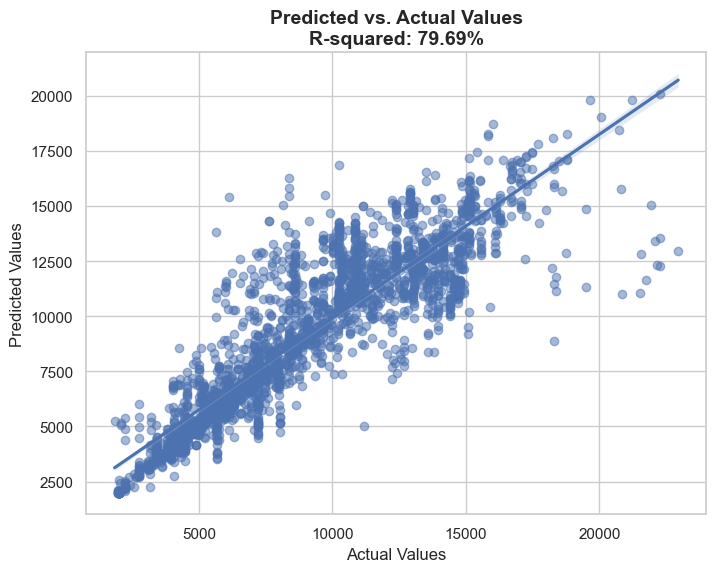

In [69]:
# Create a DataFrame for predicted and actual values
results_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

# Set up seaborn style
sns.set_style('whitegrid')

# Create a scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Actual Values', y='Predicted Values', data=results_df, scatter_kws={'alpha': 0.5})
plt.title('Predicted vs. Actual Values\nR-squared: {:.2f}%'.format(r_squared_percent),fontsize=14, fontweight='bold')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()

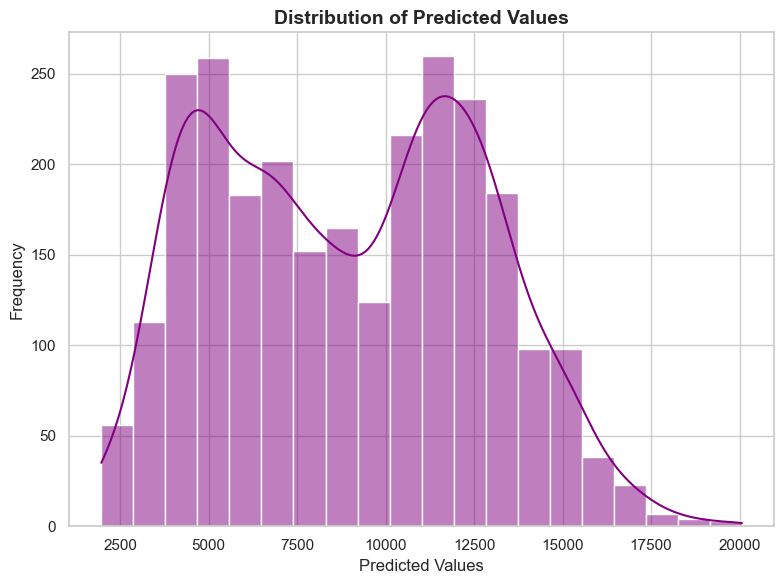

In [70]:
# Create a distplot for the predicted values
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, color='purple')

# Customize the plot
plt.title('Distribution of Predicted Values', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### We will create an automated ML model so that we can evaluate multiple models with a single code without having to write a seperate code every time

In [71]:
def predict(ml_model):
    
    model = ml_model.fit(X_train , y_train)
    
    print('The Training score is : {:.2f}%'.format(model.score(X_train , y_train)*100))
    
    y_pred = model.predict(X_test)
    
    print('The Predicted prices are : {}'.format(y_pred))
    
    print('\n')
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r_squared = r2_score(y_test, y_pred)

# Convert metrics to percentages
    mae_percent = mae * 100
    mse_percent = mse * 100
    rmse_percent = rmse * 100
    r_squared_percent = r_squared * 100

# Create a dictionary to store the metrics in percentages
    metrics_dict_percent = {
        'Mean Absolute Error (MAE)': f'{mae_percent:.2f}%',
        'Mean Squared Error (MSE)': f'{mse_percent:.2f}%',
        'Root Mean Squared Error (RMSE)': f'{rmse_percent:.2f}%',
        'R-squared': f'{r_squared_percent:.2f}%'
    }

# Create a DataFrame from the metrics_dict_percent
    metrics_df_percent = pd.DataFrame.from_dict(metrics_dict_percent, orient='index', columns=['Score'])

# Display the metrics DataFrame in percentage format
    print(metrics_df_percent)

# Create a DataFrame for predicted and actual values
    results_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

# Set up seaborn style
    sns.set_style('whitegrid')

# Create a scatter plot with regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(x='Actual Values', y='Predicted Values', data=results_df, scatter_kws={'alpha': 0.5})
    plt.title('Predicted vs. Actual Values\nR-squared: {:.2f}%'.format(r_squared_percent),fontsize=14, fontweight='bold')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

# Show the plot
    plt.show()

# Create a distplot for the predicted values
    plt.figure(figsize=(8, 6))
    sns.histplot(y_pred, kde=True, color='purple', bins=30)

# Customize the plot
    plt.title('Distribution of Predicted Values', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Show the plot
    plt.tight_layout()
    plt.show()

The Training score is : 94.62%
The Predicted prices are : [16796.63  5278.4   8938.18 ...  3478.1   6185.25  6881.3 ]


                                        Score
Mean Absolute Error (MAE)          115762.95%
Mean Squared Error (MSE)        327880351.22%
Root Mean Squared Error (RMSE)     181074.67%
R-squared                              79.80%


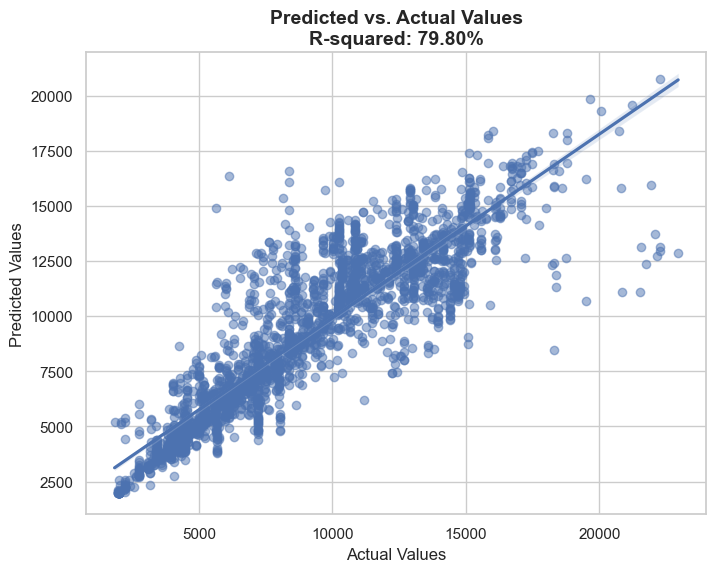

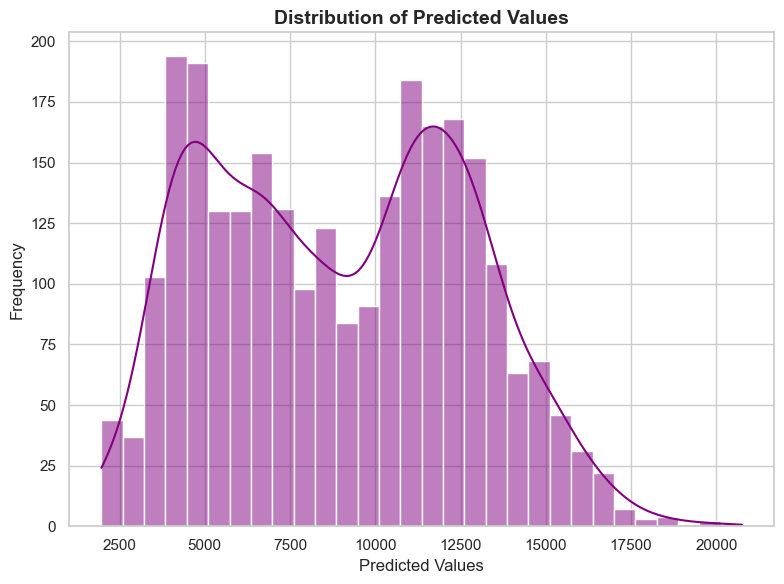

In [72]:
predict(RandomForestRegressor())

The Training score is : 96.19%
The Predicted prices are : [16840.  4959.  9397. ...  3419.  5797.  6442.]


                                        Score
Mean Absolute Error (MAE)          138570.48%
Mean Squared Error (MSE)        570238107.94%
Root Mean Squared Error (RMSE)     238796.59%
R-squared                              64.87%


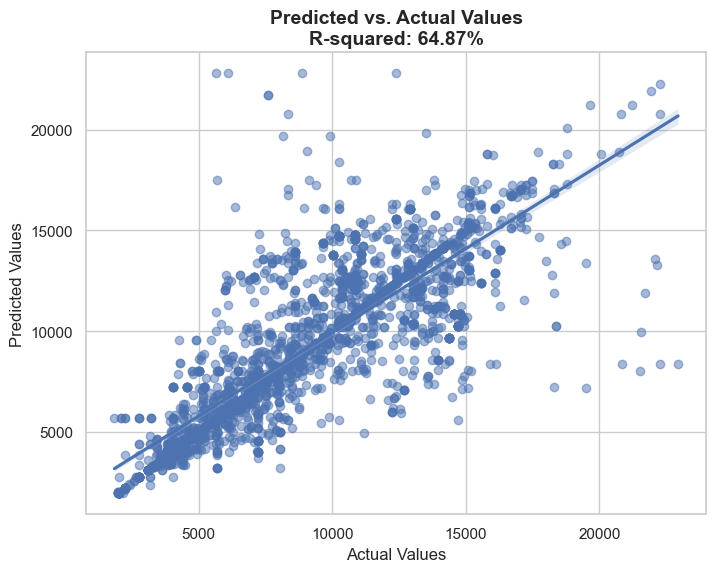

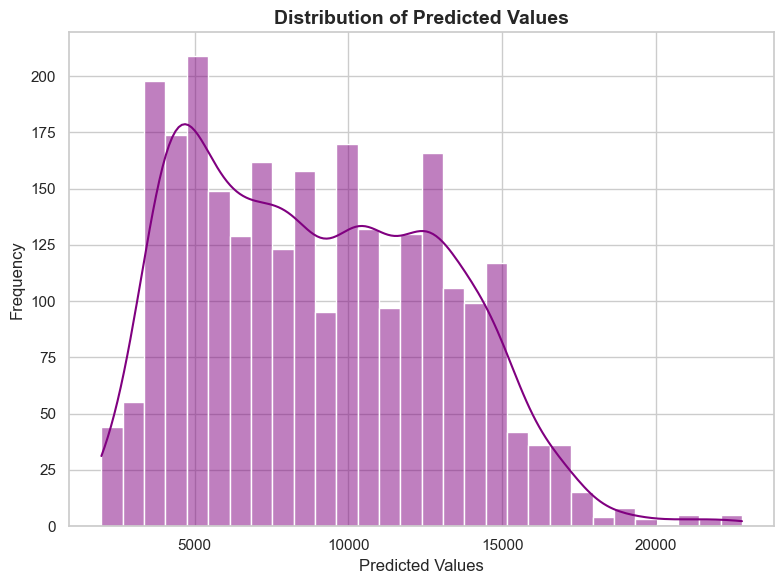

In [73]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

The Training score is : 62.35%
The Predicted prices are : [12644.83537553  8050.05496814  8900.57702276 ...  3455.9990437
  9233.51728784  7664.31264196]


                                        Score
Mean Absolute Error (MAE)          187130.45%
Mean Squared Error (MSE)        636888578.49%
Root Mean Squared Error (RMSE)     252366.51%
R-squared                              60.77%


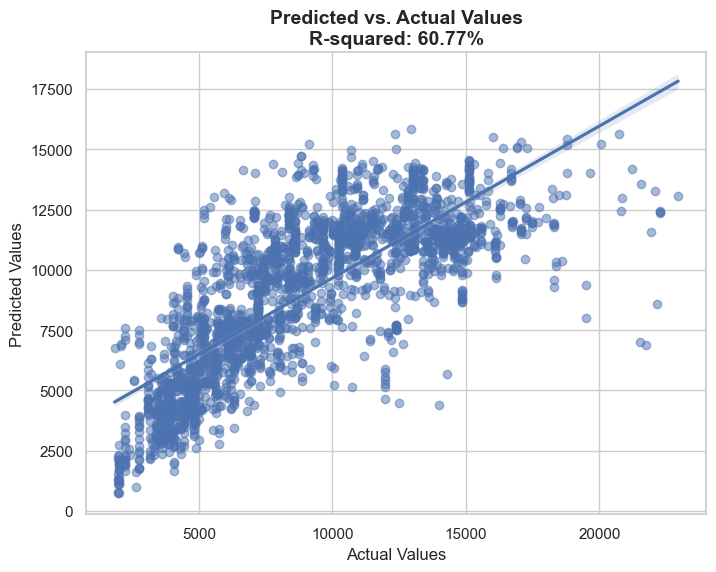

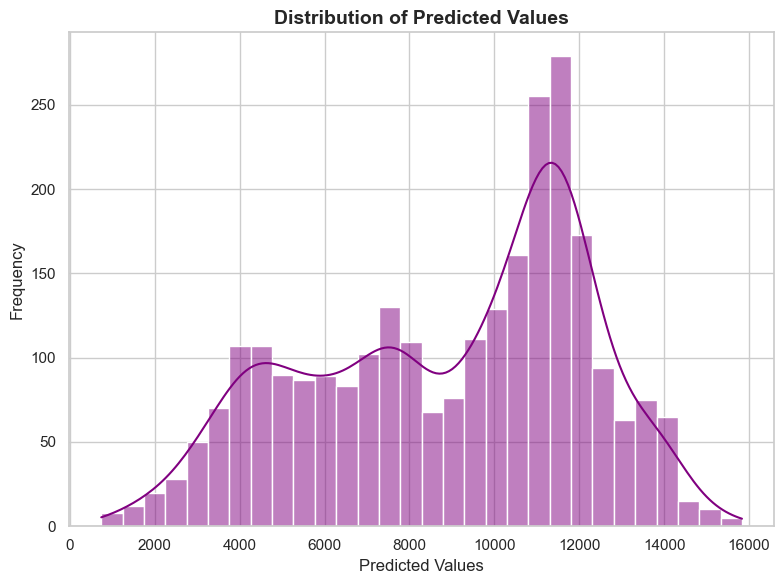

In [74]:
from sklearn.linear_model import LinearRegression
predict(LinearRegression())

The Training score is : 62.35%
The Predicted prices are : [12642.92167206  8050.25031528  8900.18507528 ...  3456.64470527
  9233.20027234  7664.3367751 ]


                                        Score
Mean Absolute Error (MAE)          187127.28%
Mean Squared Error (MSE)        636880664.23%
Root Mean Squared Error (RMSE)     252364.95%
R-squared                              60.77%


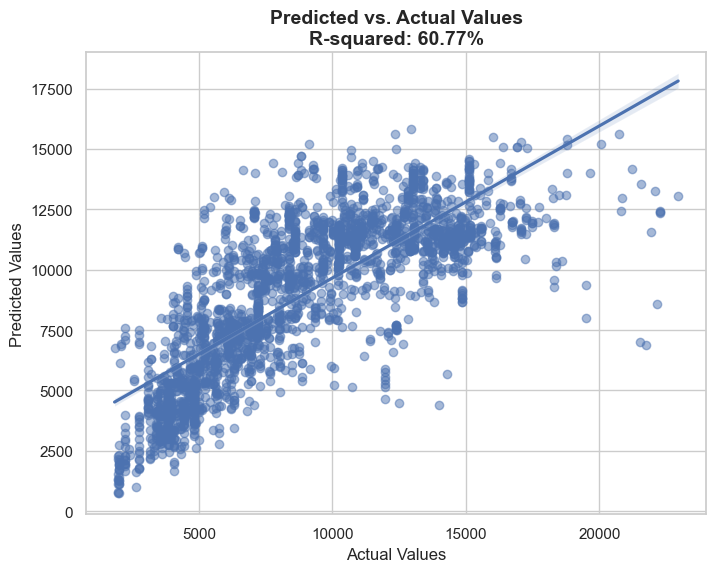

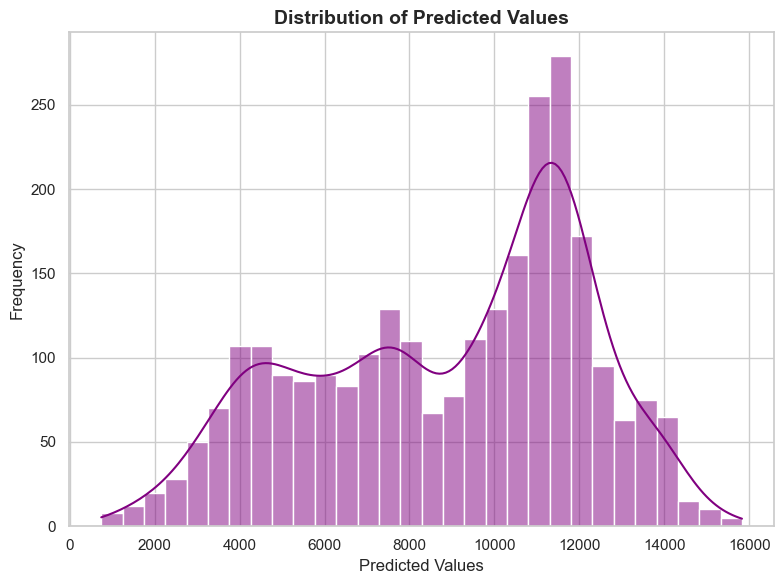

In [75]:
from sklearn.linear_model import Ridge
predict(Ridge())

The Training score is : 62.35%
The Predicted prices are : [12639.74685995  8053.47678002  8896.51595786 ...  3467.97885919
  9230.83340186  7667.5102548 ]


                                        Score
Mean Absolute Error (MAE)          187111.11%
Mean Squared Error (MSE)        636863014.47%
Root Mean Squared Error (RMSE)     252361.45%
R-squared                              60.77%


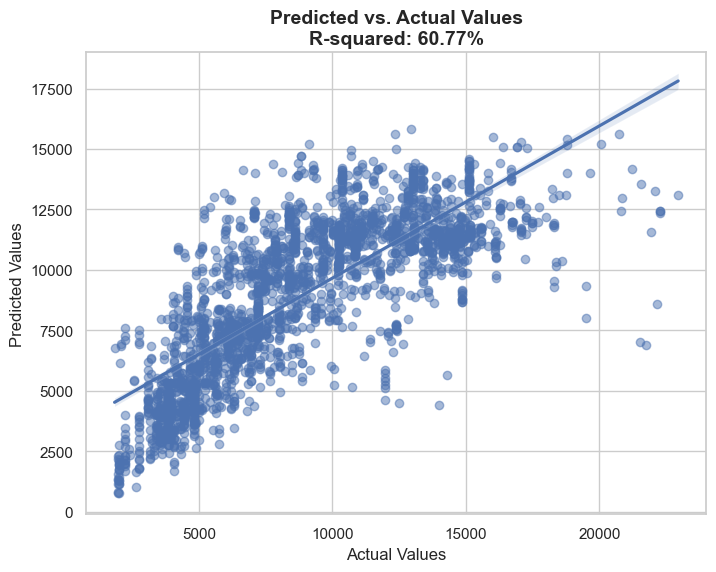

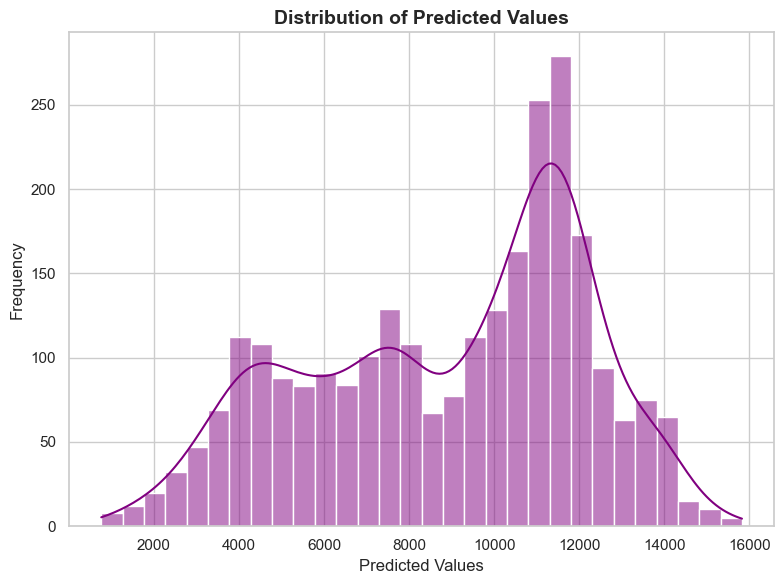

In [76]:
from sklearn.linear_model import Lasso
predict(Lasso())

The Training score is : 57.94%
The Predicted prices are : [10647.90982569  8122.17747913  8541.66173635 ...  4311.48137379
  8879.60178128  7563.19475774]


                                        Score
Mean Absolute Error (MAE)          197609.21%
Mean Squared Error (MSE)        693645167.68%
Root Mean Squared Error (RMSE)     263371.44%
R-squared                              57.27%


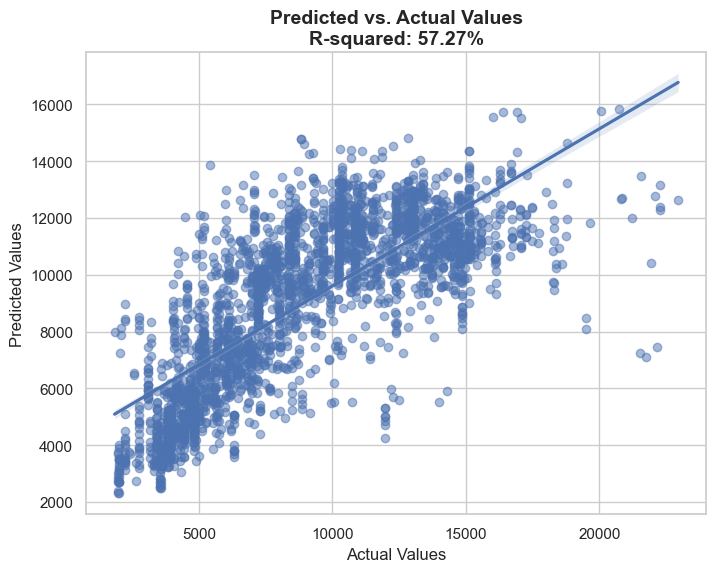

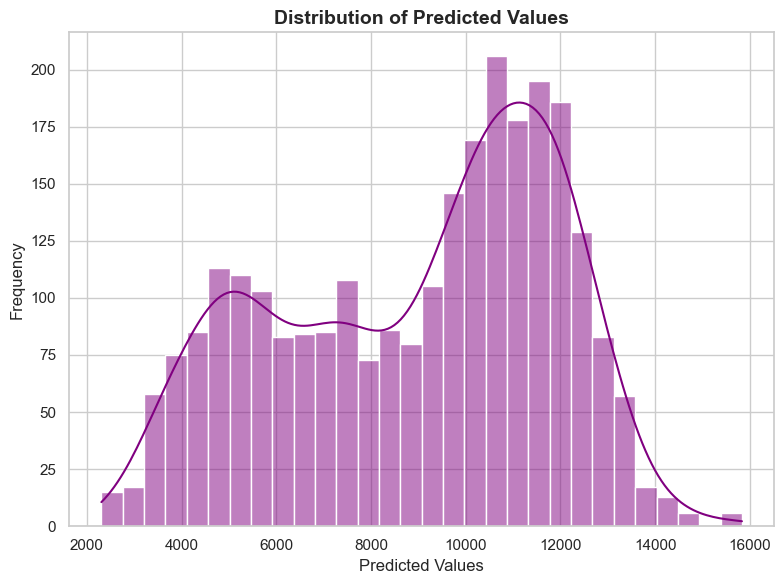

In [77]:
from sklearn.linear_model import ElasticNet
predict(ElasticNet())

The Training score is : 2.05%
The Predicted prices are : [8297.87713717 8331.05540331 8265.28256197 ... 8014.14395214 8085.95048168
 8428.01263286]


                                         Score
Mean Absolute Error (MAE)           329761.46%
Mean Squared Error (MSE)        1580690556.03%
Root Mean Squared Error (RMSE)      397578.99%
R-squared                                2.62%


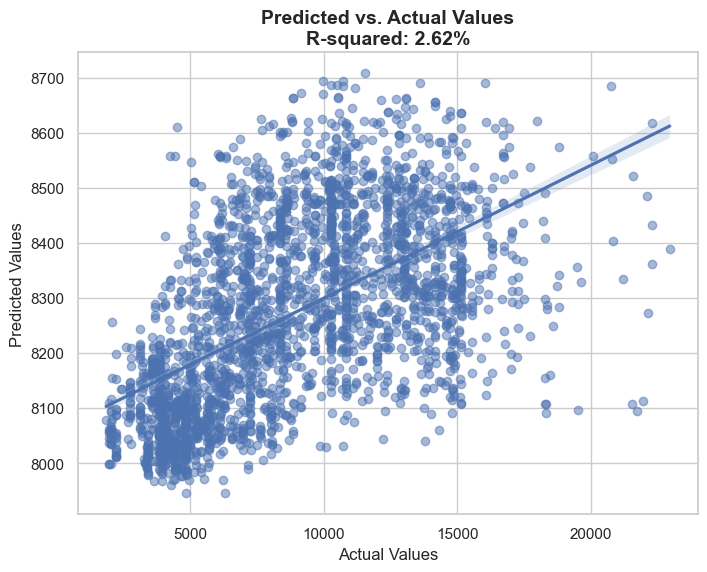

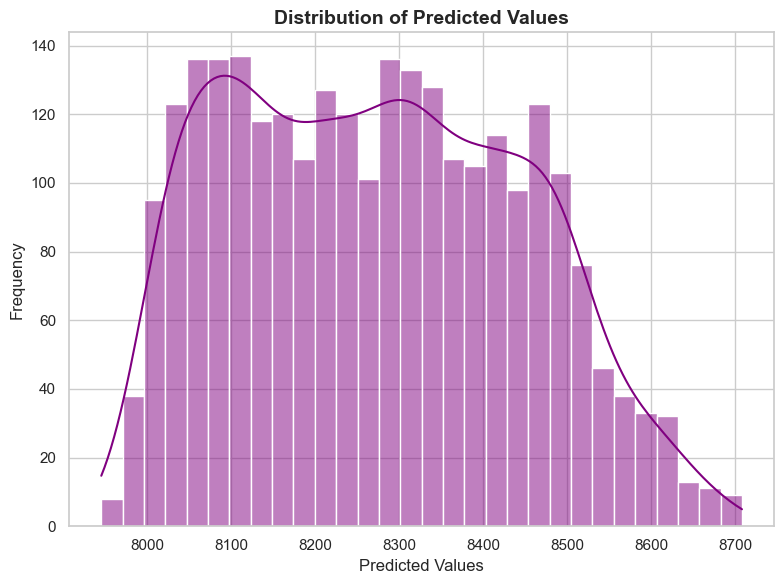

In [78]:
from sklearn.svm import SVR
predict(SVR())

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
predict(GradientBoostingClassifier())

KeyboardInterrupt: 

The Training score is : 78.21%
The Predicted prices are : [16315.   5158.2  8536.  ...  3653.4 11656.4  8159.2]


                                        Score
Mean Absolute Error (MAE)          167221.15%
Mean Squared Error (MSE)        571865480.84%
Root Mean Squared Error (RMSE)     239137.09%
R-squared                              64.77%


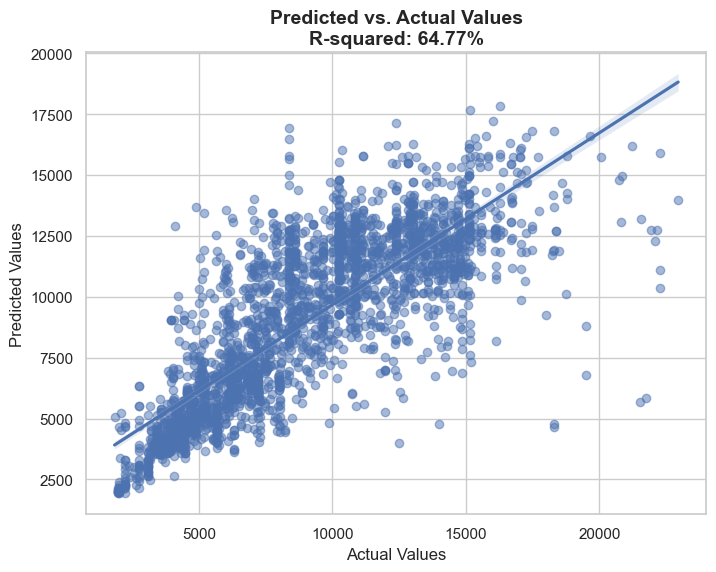

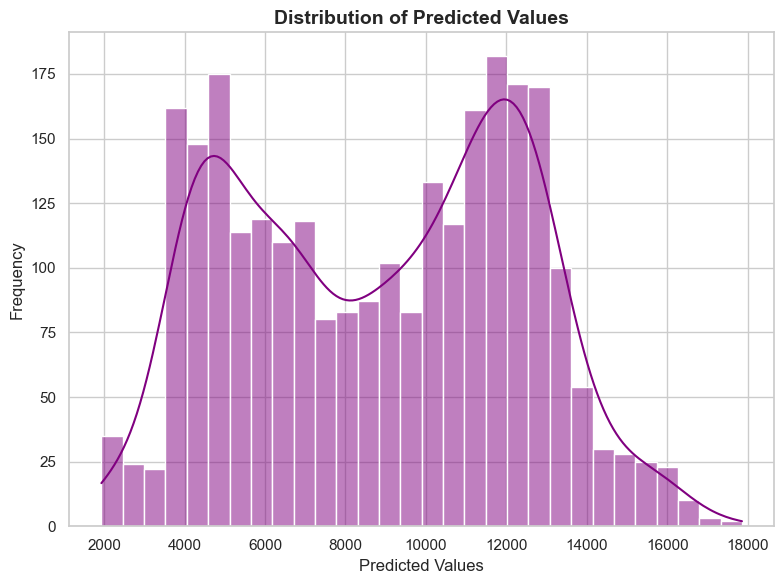

In [81]:
from sklearn.neighbors import KNeighborsRegressor
predict(KNeighborsRegressor())

C:\Users\sugosh\anaconda3\envs\flightprice\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The Training score is : 57.18%
The Predicted prices are : [11037.17766639  8434.0763416   8252.52802245 ...  3800.36080649
 10105.61248654  7040.9483574 ]


                                        Score
Mean Absolute Error (MAE)          197006.71%
Mean Squared Error (MSE)        702731432.79%
Root Mean Squared Error (RMSE)     265090.82%
R-squared                              56.71%


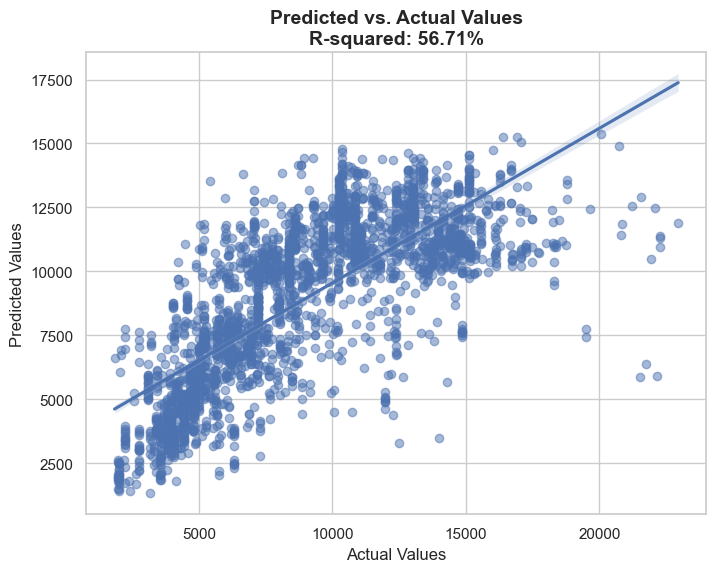

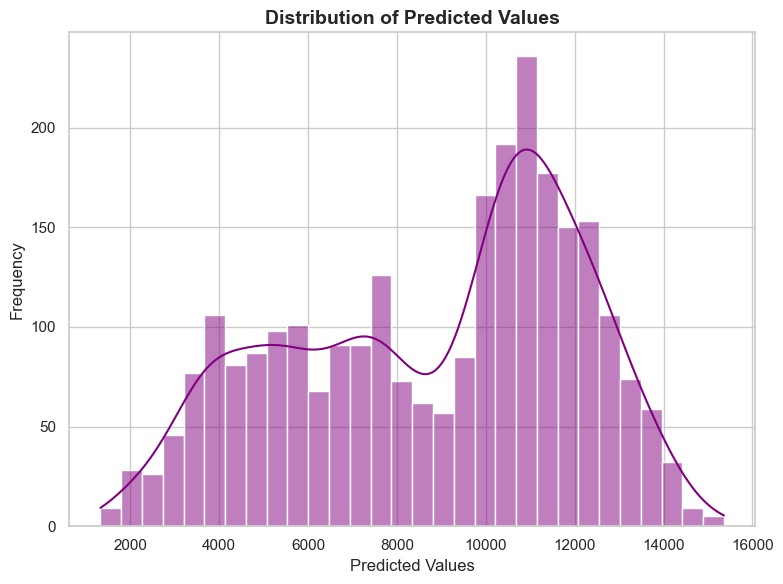

In [82]:
from sklearn.neural_network import MLPRegressor
predict( MLPRegressor())

C:\Users\sugosh\anaconda3\envs\flightprice\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training score is : 60.92%
The Predicted prices are : [12892.04552528  7730.34037845  8996.96718872 ...  3331.25348462
  9706.80133968  7041.44023838]


                                        Score
Mean Absolute Error (MAE)          187239.55%
Mean Squared Error (MSE)        659087481.53%
Root Mean Squared Error (RMSE)     256726.99%
R-squared                              59.40%


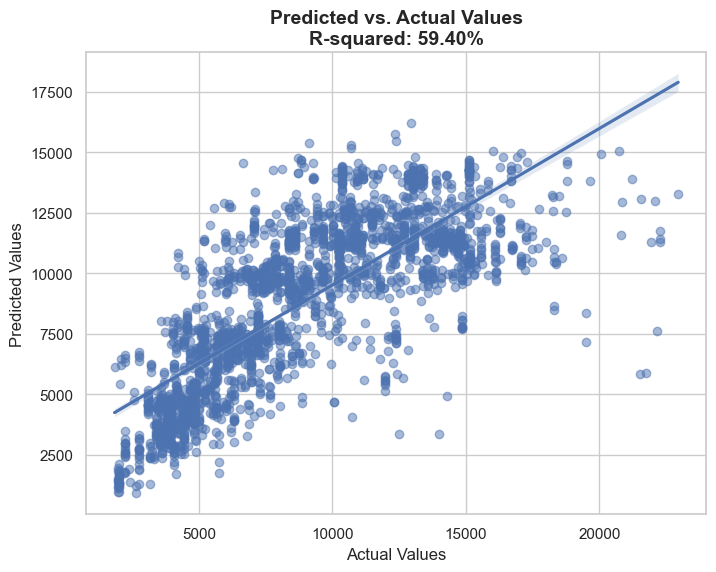

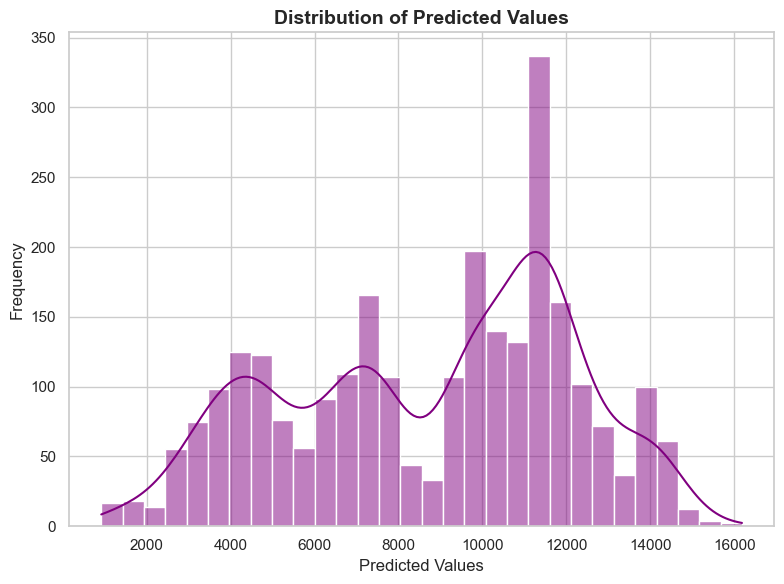

In [83]:
from sklearn.linear_model import HuberRegressor
predict( HuberRegressor ())

# 6. HYPERPARAMETER TUNING

Clearly from the metrics we understand that our model is not at the best of its performance. Hence, we need to check for the best / optimized parameters to train the ML model. We will select __Random Forest Regressor__ to make our model as it has shown the best metrics.

STEPS:
- Choose a method to perform hypertuning:
    - RandomizedSearchCV ---> Fast , The paremeter set is selected at random
    - GridSearchCV ---> Slow , The parameter Grid is pre defined
- Choose the algorithm on which hypertuning has to be performed
- Assign hyperparameters in form of dictionary , i.e , create hyper-parameter space
- Fit the hyper-parameter space on top of the model
- Check the best parameter results and score

In [111]:
from sklearn.model_selection import RandomizedSearchCV

# initialise your estimator
reg_rf = RandomForestRegressor()

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [112]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,  cv = 5, verbose = 2, n_jobs = -1)

In [113]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [114]:
rf_random.best_params_ # Check Best Parameters 

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [115]:
rf_random.best_estimator_ # Check Best Estimators

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=800)

In [116]:
print('R2 Best Score = {:.2f}%'.format(rf_random.best_score_ * 100))

R2 Best Score = 80.97%


> THE R2 SCORE OF OUR MODEL HAS INCREASED BY 1.61% FROM 79.69% TO 80.97%

## Save the Model

In [119]:
# open a file, where you want to store the data
file = open('final_trained_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

model = open('final_trained_model.pkl','rb')
forest = pickle.load(model)